In [909]:
import sys
from binance.client import Client
import pandas as pd
import numpy as np
import json
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import time
import datetime
import pandas as pd
import requests




pairSymbol2 = 'ETHUSDT'
pairSymbol1 = 'NEOUSDT'

fiatSymbol = 'USDT'
cryptoSymbol = 'ETH'

# API
binance_api_key = 'E3ORm8jmhBbCOMT73eTQBNHbNeifSx5x7kgiDF1LEuCee6aZGYwIMhQrdpAz9GWX'  # Enter your own API-key here
binance_api_secret = 'OcXfd7xiVkUYXkXN5oVwwx1TUuUoyggXeXUHOUmhFfjOgmBSGdU6f6XmxCvUK3QP'  # Enter your own API-secret here

client = Client(api_key=binance_api_key, api_secret=binance_api_secret)

def getHistorical(pairSymbol):
    klinesT = client._historical_klines(pairSymbol, Client.KLINE_INTERVAL_1HOUR, "20 day ago UTC")
    dataT = pd.DataFrame(klinesT, columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_av', 'trades', 'tb_base_av', 'tb_quote_av', 'ignore' ])
    dataT['close'] = pd.to_numeric(dataT['close'])
    dataT['high'] = pd.to_numeric(dataT['high'])
    dataT['low'] = pd.to_numeric(dataT['low'])
    dataT['open'] = pd.to_numeric(dataT['open'])
    dataT['volume'] = pd.to_numeric(dataT['volume'])
    dataT = dataT.set_index(dataT['timestamp'])
    dataT.index = pd.to_datetime(dataT.index, unit='ms')
    dataT.drop(dataT.columns.difference(['open','high','low','close','volume']), 1, inplace=True)


    return dataT

def getHistorical_future(pairSymbol):
    klinesT = client.futures_historical_klines(pairSymbol, Client.KLINE_INTERVAL_1HOUR, "20 day ago UTC")
    dataT = pd.DataFrame(klinesT, columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_av', 'trades', 'tb_base_av', 'tb_quote_av', 'ignore' ])
    dataT['close'] = pd.to_numeric(dataT['close'])
    dataT['high'] = pd.to_numeric(dataT['high'])
    dataT['low'] = pd.to_numeric(dataT['low'])
    dataT['open'] = pd.to_numeric(dataT['open'])
    dataT['volume'] = pd.to_numeric(dataT['volume'])
   
    dataT = dataT.set_index(dataT['timestamp'])
    dataT.index = pd.to_datetime(dataT.index, unit='ms')
    dataT.drop(dataT.columns.difference(['open','high','low','close','volume']), 1, inplace=True)
    return dataT


In [910]:
df_spot = getHistorical(pairSymbol1)
df_future = getHistorical_future(pairSymbol1)

print(df_spot.tail())
print(df_future.tail())

C:\Users\malco\AppData\Local\Temp/ipykernel_28896/1562289924.py:39: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dataT.drop(dataT.columns.difference(['open','high','low','close','volume']), 1, inplace=True)


                     open  high   low  close    volume
timestamp                                             
2022-11-05 13:00:00  9.09  9.12  9.02   9.07   6489.49
2022-11-05 14:00:00  9.07  9.12  9.01   9.05  11939.11
2022-11-05 15:00:00  9.04  9.15  9.04   9.13  12064.35
2022-11-05 16:00:00  9.12  9.19  9.12   9.17  17136.15
2022-11-05 17:00:00  9.17  9.18  9.11   9.12   5722.32
                      open   high    low  close     volume
timestamp                                                 
2022-11-05 13:00:00  9.080  9.121  9.017  9.069   78830.60
2022-11-05 14:00:00  9.068  9.114  9.000  9.046   67549.30
2022-11-05 15:00:00  9.046  9.147  9.036  9.130   96420.56
2022-11-05 16:00:00  9.127  9.190  9.121  9.178  101383.41
2022-11-05 17:00:00  9.175  9.175  9.110  9.133   44767.55


C:\Users\malco\AppData\Local\Temp/ipykernel_28896/1562289924.py:55: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dataT.drop(dataT.columns.difference(['open','high','low','close','volume']), 1, inplace=True)


In [911]:
start_time = 1609462800

historical = requests.get(f'https://ftx.com/api/markets/NEO-PERP/candles?resolution=3600&start_time={start_time}').json()

historical = pd.DataFrame(historical['result'])
historical.drop(['startTime'], axis = 1, inplace=True)
historical['time'] = pd.to_datetime(historical['time'], unit='ms')
historical.set_index('time', inplace=True)
historical.tail()

,open,high,low,close,volume
time,,,,,
2022-11-05 13:00:00,9.0850,9.1225,9.0225,9.0725,48425.07675
2022-11-05 14:00:00,9.0725,9.1175,9.0050,9.0500,38505.96775
2022-11-05 15:00:00,9.0500,9.1500,9.0425,9.1325,66508.15850
2022-11-05 16:00:00,9.1325,9.1925,9.1250,9.1725,81697.70950
2022-11-05 17:00:00,9.1725,9.1725,9.1125,9.1300,35914.64475


In [912]:
df_difference_ = pd.DataFrame()
df_difference_ = (df_future - historical)/df_future * 100
print(df_difference_.tail())
print(df_difference_.mean() )

                         open      high       low     close     volume
2022-11-05 13:00:00 -0.055066 -0.016446 -0.060996 -0.038593  38.570711
2022-11-05 14:00:00 -0.049625 -0.038402 -0.055556 -0.044218  42.995756
2022-11-05 15:00:00 -0.044218 -0.032798 -0.071934 -0.027382  31.022846
2022-11-05 16:00:00 -0.060261 -0.027203 -0.043855  0.059926  19.417083
2022-11-05 17:00:00  0.027248  0.027248 -0.027442  0.032848  19.775273
open      -0.043297
high      -0.056936
low       -0.062107
close     -0.043805
volume    56.057956
dtype: float64


In [913]:
import ta
df_difference_['SMAS']= ta.trend.ema_indicator(close=df_difference_['close'], window=10)
df_difference_['SMAL']= ta.trend.ema_indicator(close=df_difference_['close'], window=9)

df_spot['ATR']= ta.volatility.average_true_range(high=df_spot['high'],low=df_spot['low'], close=df_spot['close'], window=20)
df_future['ATR']= ta.volatility.average_true_range(high=df_future['high'],low=df_future['low'], close=df_future['close'], window=20)


BOL_BAND = ta.volatility.BollingerBands(close=df_difference_['close'], window=15, window_dev=1)
df_difference_['BOL_H_BAND'] = BOL_BAND.bollinger_hband() #Bande Supérieur
df_difference_['BOL_L_BAND'] = BOL_BAND.bollinger_lband() #Bande inférieur
df_difference_['BOL_MAVG_BAND'] = BOL_BAND.bollinger_mavg() #Bande moyenne


BOL_BAND = ta.volatility.BollingerBands(close=df_spot['close'], window=20, window_dev=2)
df_spot['BOL_H_BAND'] = BOL_BAND.bollinger_hband() #Bande Supérieur
df_spot['BOL_L_BAND'] = BOL_BAND.bollinger_lband() #Bande inférieur
df_spot['BOL_MAVG_BAND'] = BOL_BAND.bollinger_mavg() #Bande moyenne



In [914]:
df_difference_['signal'] = np.where((df_difference_['close'] < -0.1), 1, 0)
#df_difference_['signal'] = np.where((df_difference_['close'] > df_difference_['SMAS']), -1,df_difference_['signal'])

In [915]:
df_difference_.loc[df_difference_['signal'] == 1]

,open,high,low,close,volume,SMAS,SMAL,BOL_H_BAND,BOL_L_BAND,BOL_MAVG_BAND,signal
2022-10-18 08:00:00,-0.080635,-0.086709,-0.100921,-0.107134,28.001408,-0.045585,-0.048260,0.017707,-0.061838,-0.022066,1
2022-10-19 21:00:00,-0.038256,-0.044535,-0.038304,-0.127632,-91.902341,-0.045305,-0.047093,-0.004185,-0.066531,-0.035358,1
2022-10-20 17:00:00,-0.057121,-0.031726,-0.102538,-0.108710,17.369131,-0.047844,-0.048980,-0.017634,-0.070688,-0.044161,1
2022-10-22 08:00:00,-0.108019,-0.069647,-0.108087,-0.107882,41.843827,-0.067726,-0.069828,-0.020089,-0.085470,-0.052780,1
2022-10-22 17:00:00,-0.075719,-0.163790,-0.101240,-0.138819,65.137502,-0.082107,-0.083786,-0.048105,-0.103861,-0.075983,1
2022-10-22 21:00:00,-0.037397,-0.037327,-0.106730,-0.125471,37.569990,-0.082915,-0.084015,-0.052906,-0.109290,-0.081098,1
2022-10-23 03:00:00,-0.006210,-0.086763,-0.081037,-0.118410,-1.370702,-0.068935,-0.069324,-0.027885,-0.107529,-0.067707,1
2022-10-24 00:00:00,-0.011725,-0.034957,-0.135438,-0.111725,-3.215995,-0.046565,-0.048164,0.006686,-0.076024,-0.034669,1
2022-10-24 09:00:00,-0.041946,-0.089445,-0.060314,-0.113460,-33.991183,-0.059458,-0.061120,-0.021948,-0.081498,-0.051723,1
2022-10-24 12:00:00,-0.030084,-0.090036,-0.108617,-0.114348,4.570591,-0.068037,-0.069710,-0.030053,-0.092126,-0.061090,1


No handles with labels found to put in legend.


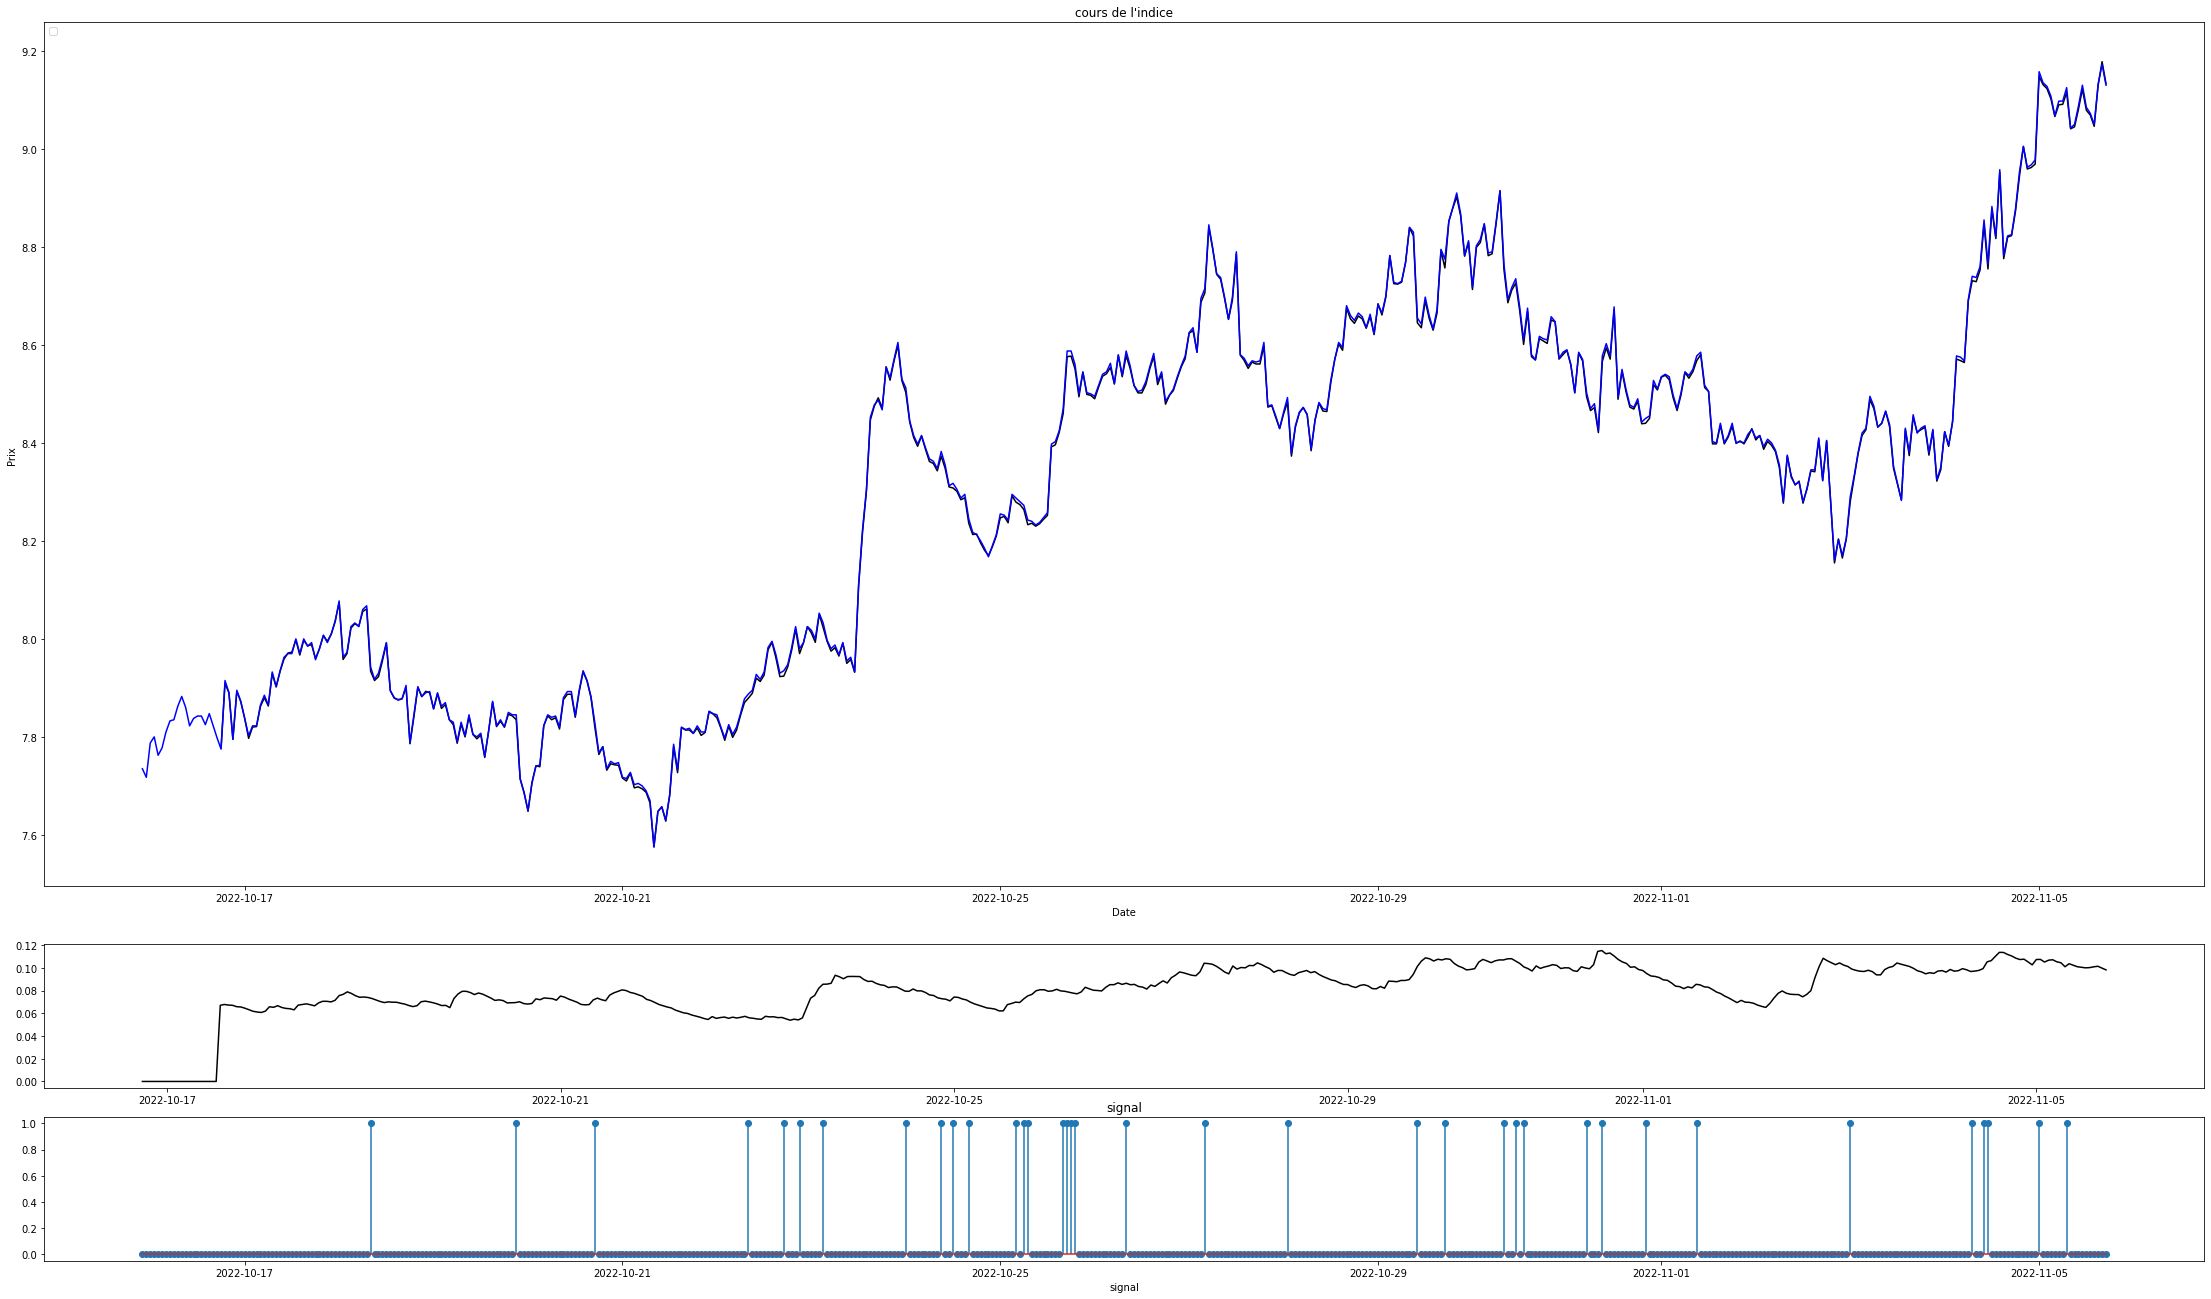

In [916]:
fig = plt.figure()

df = df_difference_.tail(500)

x = df["signal"]

axes2 = fig.add_axes([0.1, 0.5, 5, 0.5]) 
axes3 = fig.add_axes([0.1, 1.8, 5, 3])

axes1 = fig.add_axes([0.1, 1.1, 5, 0.5])

# axes1 = fig.add_axes([0.1, 1.6, 5, 3])
# axes2 = fig.add_axes([0.1, 1.1, 5, 0.5]) 
# axes3 = fig.add_axes([0.1, 0.1, 5, 1])

z = df_future['close'].tail(500)
z1 = historical['close'].tail(500)


axes1.plot(df_future['ATR'].tail(500), 'black')
# axes2.stem(df.index,x,use_line_collection = True)
axes2.stem(df.index,x,use_line_collection = True)
axes2.set_xlabel('signal')
axes2.set_title('signal')

axes3.plot(z, 'black')
axes3.plot(z1, 'blue')

axes3.set_xlabel('Date')
axes3.set_ylabel('Prix')
axes3.set_title("cours de l'indice");  
axes3.legend(loc = 2,fontsize='medium')




<AxesSubplot:>

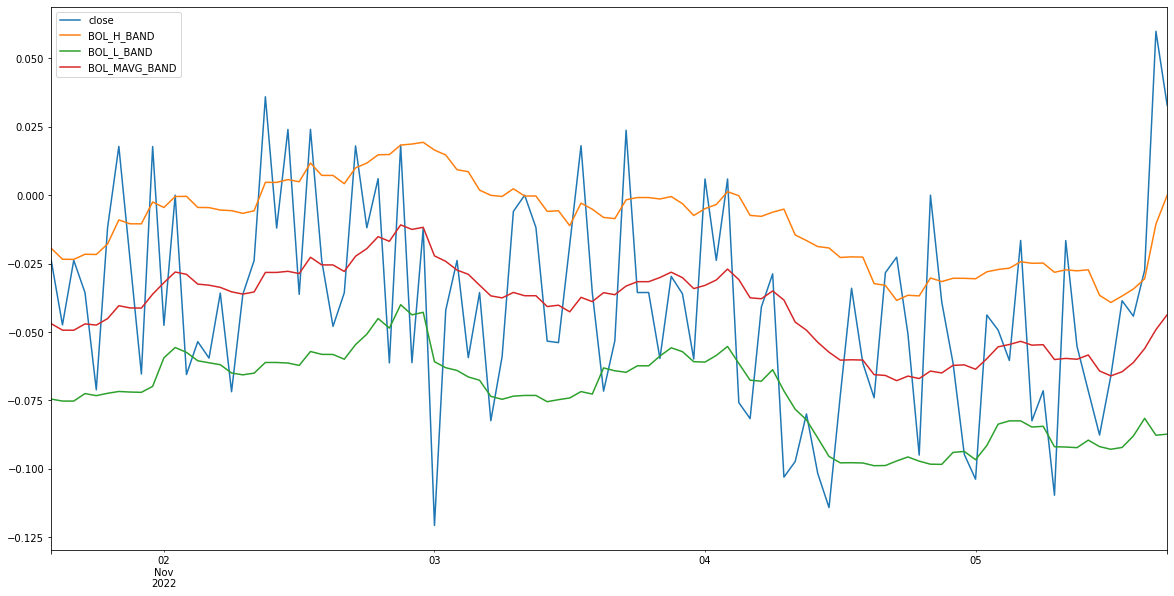

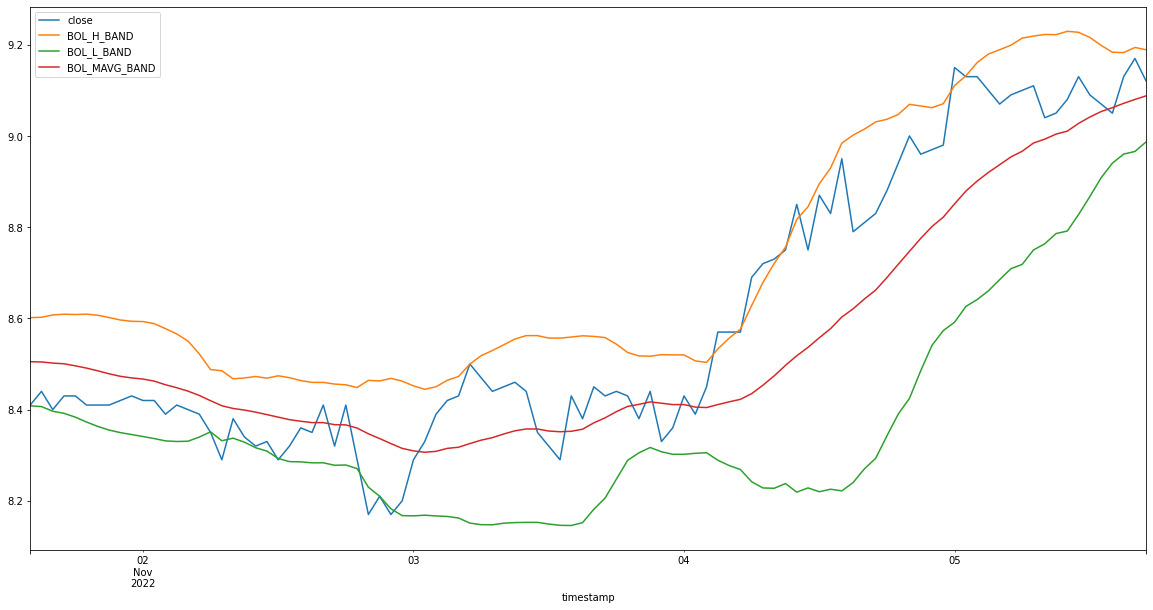

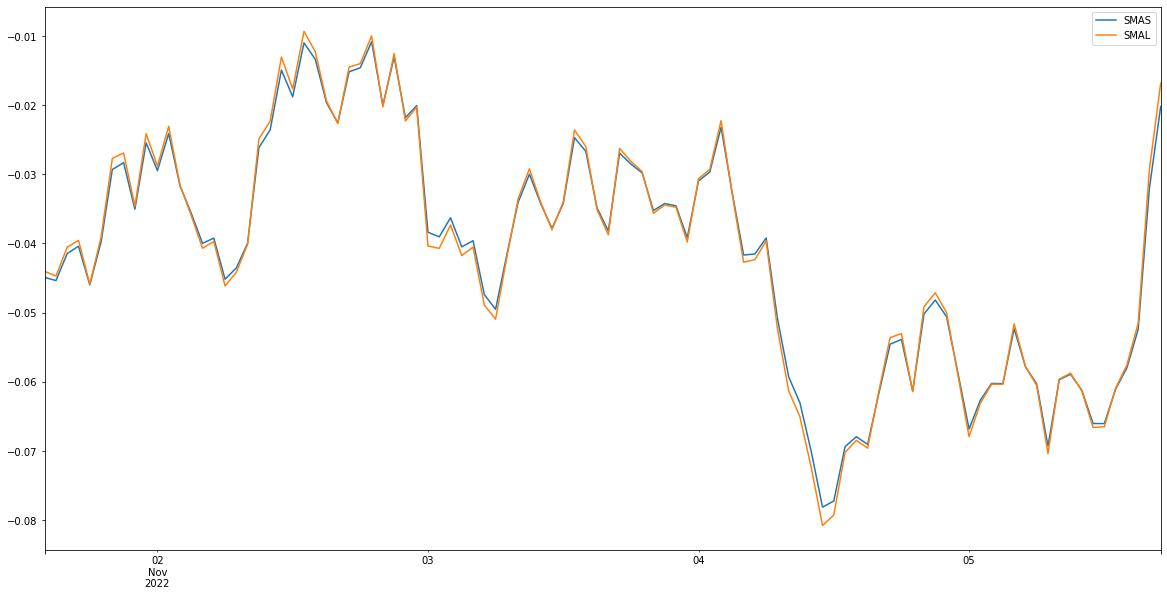

In [917]:
df_difference_[['close','BOL_H_BAND','BOL_L_BAND','BOL_MAVG_BAND']].tail(100).plot(subplots=False, figsize=(20, 10))
df_spot[['close','BOL_H_BAND','BOL_L_BAND','BOL_MAVG_BAND']].tail(100).plot(subplots=False, figsize=(20, 10))
df_difference_[['SMAS', 'SMAL']].tail(100).plot(subplots=False, figsize=(20, 10))
